In [1]:
#結果をインライン表示するための関数
from IPython.display import display, Image
def display_cv_image(image, format='.png'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [3]:
def face_count(image_path,file):
    #RGB値をarrayに格納してpythonで扱えるように
    image=cv2.imread(image_path) 
#     display_cv_image(image)
    #グレースケールに変換
    image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #顔認識特徴量のファイル指定
    cascade_path = "./haarcascades/haarcascade_frontalface_alt.xml"
    #カスケード分類器の特徴量を取得
    cascade=cv2.CascadeClassifier(cascade_path)
    #顔認識の実行
    facerecog=cascade.detectMultiScale(image_gray,scaleFactor=1.1, minNeighbors=2, minSize=(1, 1))
    #　認識した顔を囲む矩形の色を指定。ここでは白。
    color = (255, 255, 255) 
    if len(facerecog) > 0:
        # 認識した顔全てを矩形で囲む
        for i,rect in enumerate(facerecog):
            # 認識結果を表示
#             print ("認識結果")
#             print ("(x,y)=(" + str(rect[0]) + "," + str(rect[1])+ ")" + \
#                 "  高さ："+str(rect[2]) + \
#                 "  幅："+str(rect[3]))
            x = rect[0]
            y = rect[1]
            w = rect[2]
            h = rect[3]
            # img[y: y + h, x: x + w] 
            cv2.rectangle(image, tuple(rect[0:2]),tuple(rect[0:2]+rect[2:4]), color, thickness=2)
            #結果の画像を保存するなら以下のコメントアウトを外す
            cv2.imwrite('scam_imgs/{0}_{1}.jpg'.format(file,i), image[y:y+h, x:x+w])
        # 認識結果の出力
#         display_cv_image(image)
        return len(facerecog)
    else:
        print('顔無し!!!')
        return -1
    # cv2.imwrite("result.jpg", image)

In [4]:
files=os.listdir('ImagesFromTwitter/')

In [5]:
len(files)

1467

In [6]:
files[0]

'DSmJMNyVMAAVGSn.jpg'

In [7]:
# image=cv2.imread('ImagesFromTwitter/'+files[0]) 
# display_cv_image(image)

In [8]:
for file in files:
    count=face_count('ImagesFromTwitter/'+file,file)
    print(count)

顔無し!!!
-1
顔無し!!!
-1
1
顔無し!!!
-1
3
顔無し!!!
-1
顔無し!!!
-1
2
3
顔無し!!!
-1
1
2
1
顔無し!!!
-1
顔無し!!!
-1
顔無し!!!
-1
顔無し!!!
-1
1
1
2
3
2
5
2
顔無し!!!
-1
3
顔無し!!!
-1
1
3
5
顔無し!!!
-1
7
顔無し!!!
-1
1
4
1
顔無し!!!
-1
顔無し!!!
-1
1
2
1
4
1
顔無し!!!
-1
1
顔無し!!!
-1
2
2
1
顔無し!!!
-1
1
顔無し!!!
-1
1
1
顔無し!!!
-1
顔無し!!!
-1
顔無し!!!
-1
顔無し!!!
-1
1
顔無し!!!
-1
顔無し!!!
-1
顔無し!!!
-1
顔無し!!!
-1
1
2
1
1
2
顔無し!!!
-1
顔無し!!!
-1
顔無し!!!
-1
1
1
3
2
2
2
1
顔無し!!!
-1
5
1
1
顔無し!!!
-1
1
顔無し!!!
-1
1
顔無し!!!
-1
顔無し!!!
-1
顔無し!!!
-1
1
1
13
1
3
顔無し!!!
-1
1
顔無し!!!
-1
顔無し!!!
-1
1
顔無し!!!
-1
顔無し!!!
-1
1
顔無し!!!
-1
顔無し!!!
-1
2
2
顔無し!!!
-1
2
1
顔無し!!!
-1
顔無し!!!
-1
顔無し!!!
-1
顔無し!!!
-1
顔無し!!!
-1
顔無し!!!
-1
顔無し!!!
-1
顔無し!!!
-1
1
顔無し!!!
-1
1
1
1
3
3
3
2
2
顔無し!!!
-1
顔無し!!!
-1
1
顔無し!!!
-1
顔無し!!!
-1
顔無し!!!
-1
顔無し!!!
-1
1
4
顔無し!!!
-1
顔無し!!!
-1
3
顔無し!!!
-1
顔無し!!!
-1
2
3
3
1
顔無し!!!
-1
顔無し!!!
-1
顔無し!!!
-1
顔無し!!!
-1
1
2
1
2
1
1
6
顔無し!!!
-1
3
顔無し!!!
-1
顔無し!!!
-1
顔無し!!!
-1
2
顔無し!!!
-1
顔無し!!!
-1
顔無し!!!
-1
10
1
2
顔無し!!!
-1
2
1
顔無し!!!
-1
1
顔無し!!!
-1
1
顔無し!!!
-1
5
顔無し!!!
-1
1


In [9]:
from PIL import Image
import numpy as np
from matplotlib import pylab as plt

In [10]:
res_files=os.listdir('scam_imgs/')

In [11]:
images=[]
for i in range(500):
    images.append(np.array(Image.open('scam_imgs/'+res_files[i])))

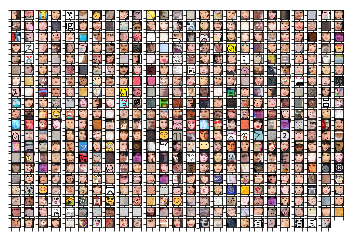

In [12]:
for i in range(1, 500):
    plt.subplot(20, 25, i)
    plt.tick_params(labelbottom='off')
    plt.tick_params(labelleft='off')
    plt.imshow( images[i - 1] )

In [13]:
len(res_files)

1752